In [1]:
# -*- coding:utf-8 -*-
# 词云展示
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from lxml import etree
from nltk.tokenize import word_tokenize

In [2]:
# 去掉停用词
def remove_stop_words(f):
    stop_words = ['Movie']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f

In [3]:
# 生成词云
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    f = remove_stop_words(f)
    cut_text = word_tokenize(f)
    #print(cut_text)
    cut_text = " ".join(cut_text)
    wc = WordCloud(
        max_words=100,
        width=2000,
        height=1200,
    )
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [4]:
# 数据加载
data = pd.read_csv('./Market_Basket_Optimisation.csv', header=None)
# 将数据放到transactions中
transactions=[]
# 存储key:value
item_count={}
for i in range(0, data.shape[0]):
    temp=[]
    for j in range(0, data.shape[1]):
        item=str(data.values[i, j])
        if item != 'nan':
            temp.append(item)
            if item not in item_count:
                item_count[item]=1
            else:
                item_count[item]+=1
    transactions.append(temp)

根据词频，开始生成词云!


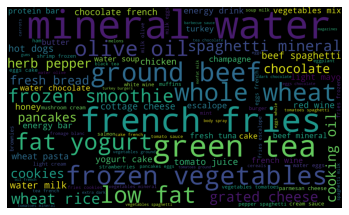

[('mineral water', 1788), ('eggs', 1348), ('spaghetti', 1306), ('french fries', 1282), ('chocolate', 1230), ('green tea', 991), ('milk', 972), ('ground beef', 737), ('frozen vegetables', 715), ('pancakes', 713), ('burgers', 654), ('cake', 608), ('cookies', 603), ('escalope', 595), ('low fat yogurt', 574), ('shrimp', 536), ('tomatoes', 513), ('olive oil', 494), ('frozen smoothie', 475), ('turkey', 469), ('chicken', 450), ('whole wheat rice', 439), ('grated cheese', 393), ('cooking oil', 383), ('soup', 379), ('herb & pepper', 371), ('honey', 356), ('champagne', 351), ('fresh bread', 323), ('salmon', 319), ('brownies', 253), ('avocado', 250), ('hot dogs', 243), ('cottage cheese', 239), ('tomato juice', 228), ('butter', 226), ('whole wheat pasta', 221), ('red wine', 211), ('yogurt cake', 205), ('light mayo', 204), ('energy bar', 203), ('ham', 203), ('energy drink', 200), ('pepper', 199), ('vegetables mix', 193), ('cereals', 193), ('muffins', 181), ('oil', 173), ('french wine', 169), ('fres

In [6]:
#生成词云
all_word=' '.join('%s' %item for item in transactions)
create_word_cloud(all_word)

#输出TOP10商品
print(sorted(item_count.items(), key=lambda x:x[1], reverse=True))